In [22]:
from PIL import Image

In [4]:
import json

In [24]:
with open("../data/robo/test/_annotations.coco.json") as f:
    annotations = json.load(f)

In [25]:
annotations

{'info': {'year': '2021',
  'version': '24',
  'description': 'Exported from roboflow.ai',
  'contributor': 'Roboflow',
  'url': 'https://public.roboflow.ai/object-detection/chess-full',
  'date_created': '2021-02-23T17:32:58+00:00'},
 'licenses': [{'id': 1,
   'url': 'https://creativecommons.org/publicdomain/zero/1.0/',
   'name': 'Public Domain'}],
 'categories': [{'id': 0, 'name': 'pieces', 'supercategory': 'none'},
  {'id': 1, 'name': 'bishop', 'supercategory': 'pieces'},
  {'id': 2, 'name': 'black-bishop', 'supercategory': 'pieces'},
  {'id': 3, 'name': 'black-king', 'supercategory': 'pieces'},
  {'id': 4, 'name': 'black-knight', 'supercategory': 'pieces'},
  {'id': 5, 'name': 'black-pawn', 'supercategory': 'pieces'},
  {'id': 6, 'name': 'black-queen', 'supercategory': 'pieces'},
  {'id': 7, 'name': 'black-rook', 'supercategory': 'pieces'},
  {'id': 8, 'name': 'white-bishop', 'supercategory': 'pieces'},
  {'id': 9, 'name': 'white-king', 'supercategory': 'pieces'},
  {'id': 10, 'na

In [61]:
def extract_images(directory):
    full_path = f"../data/robo/{directory}"
    with open(f"{full_path}/_annotations.coco.json") as f:
        annotations = json.load(f)
    images = annotations["images"]
    bboxs = { ann["id"]: ann for ann in annotations["annotations"] }
    for image in images:
        print("Extracting", image)
        fn = image["file_name"]
        bbox = bboxs[image["id"]]
        print("Bbox", bbox)
        img = modify_image(f"{full_path}/{fn}", 90, 180, crop=bbox["bbox"])
        img.save(f"data/{fn}", "JPEG")

In [55]:
def modify_image(img_path, ds_w, ds_h, crop=None):
    img = Image.open(img_path)
    if crop is not None:
        x, y, w, h = crop
        img = img.crop((x, y, x+w, y+h))
    else:
        w, h = img.size
    if w / h < ds_w / ds_h:
        # Height is limiting factor, pad width
        new_height = ds_h
        new_width = round(w * ds_h / h)
    else:
        new_width = ds_w
        new_height = round(h * ds_w / w)
    result = Image.new(img.mode, (ds_w, ds_h), (0, 0, 0))
    result.paste(img.resize((new_width, new_height), Image.ANTIALIAS),
                 (round(ds_w / 2 - new_width / 2), round(ds_h / 2 - new_height / 2)))
    return result

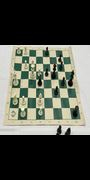

In [57]:
modify_image("../data/robo/test/a3863d0be6002c21b20ac88817b2c56f_jpg.rf.0413d5178136ace55f588df9556c060a.jpg", 90, 180, crop=(171, 221, 25, 58))

In [62]:
extract_images("test")

Extracting {'id': 0, 'license': 1, 'file_name': 'a3863d0be6002c21b20ac88817b2c56f_jpg.rf.0413d5178136ace55f588df9556c060a.jpg', 'height': 416, 'width': 416, 'date_captured': '2021-02-23T17:32:58+00:00'}
Bbox {'id': 0, 'image_id': 0, 'category_id': 8, 'bbox': [172, 221, 25, 58.5], 'area': 1462.5, 'segmentation': [], 'iscrowd': 0}


In [66]:
import tqdm

ModuleNotFoundError: No module named 'tqdm'